In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import os


<img src="../static/images/logo.jpg" alt="Project logo" width="500" height="600">

<h1> Agenda </h1>
<ul>
    <li>Personal Introduction</li>
    <li>Project Overview</li>
    <li>Technologies Used</li>
    <li>Best Recommendation Systems</li>
</ul>

<h1> The Cat's Pajamas Overview </h1>
    <p>
    The main idea of the project is iteratively building a series of Fashion Recommender Systems. The Recommenders with the best precision will be the final winning recommenders. This will enable us to experiment how different algorithms are related to each other and how they can be manipulated for better precision. Some of the techniques that we will involve in our experimentation are -
    <ul>
        <li>Term Frequency - Inverse Term Frequency (Tf-idf)</li>
        <li>Binary Vectorization</li>
        <li>Image Activations from Convolutional neural network that classify cloth images.</li>
     </ul>
     The Dataset is out of competition that took place on kaggle. The dataset contains H and M sales transactions over a period of one year
    This is a huge Dataset that is over 34GB. The size, cleaning, analysis and exploration of this data is one of the main challenges of this final year project. 
    </p>
    <p>
      Due to Hardware limitations, one month of the data was sampled. That resulted on over 26000 products and their images and over a million transactions.
    </p>

<img src="../static/images/tech.jpg" alt="Tech used in the project" width="500" height="600">

<h1> The Best Recommendation Systems</h1>
<ol>
    <li>Convolutional Neural Network Based Recommender</li>
    <li>Binary Vector Based Recommender</li>
</ol>

<h2>Convolutional Neural Network Based Recommender</h2>

In [7]:
articles_df = pd.read_csv("../datasets/articles_transactions_5.csv")
i = articles_df.copy()
i['detail_desc'] = i['detail_desc'].fillna("")
i.shape

(26722, 26)

In [3]:
t = pd.read_csv("../datasets/transactions_5.csv")

In [4]:
fashion_classifier = load_model("../Weights/cnn3_new.h5")
fashion_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 model (Functional)          (None, 10)                241546    
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 130)               1332

In [9]:
embeddings_df = pd.read_csv('../Datasets/col_cnn_embeddings.csv')
cnn_cosine = cosine_similarity(embeddings_df.drop('image',axis=1))
images = embeddings_df['image'].values
cnn_cosine_df = pd.DataFrame(cnn_cosine, columns=images, index=images)
cnn_cosine_df.head(25)

,775310002,872813003,872813001,860411004,883068004,866755001,399256002,873428004,873428001,883068001,...,806261002,893215001,697050011,783802002,899222001,570900005,712216011,816995001,682854005,805505001
775310002,1.000000,0.561984,0.454619,0.492921,0.491716,0.236495,0.152234,0.261877,0.245796,0.272522,...,0.000058,0.000072,0.000058,0.000044,0.000084,0.000043,0.000093,0.000054,0.000082,0.000065
872813003,0.561984,1.000000,0.944661,0.790820,0.722532,0.741748,0.690243,0.639194,0.623160,0.603402,...,0.457105,0.457113,0.457106,0.457128,0.457102,0.457117,0.457101,0.457110,0.457103,0.457103
872813001,0.454619,0.944661,1.000000,0.929606,0.878210,0.919415,0.853634,0.847321,0.836406,0.821237,...,0.718954,0.718959,0.718954,0.718971,0.718952,0.718962,0.718952,0.718957,0.718953,0.718952
860411004,0.492921,0.790820,0.929606,1.000000,0.978373,0.954371,0.883435,0.953942,0.945616,0.941945,...,0.839326,0.839329,0.839326,0.839323,0.839332,0.839321,0.839335,0.839324,0.839332,0.839328
883068004,0.491716,0.722532,0.878210,0.978373,1.000000,0.935744,0.873853,0.965164,0.962396,0.966278,...,0.858353,0.858361,0.858353,0.858345,0.858362,0.858347,0.858363,0.858351,0.858362,0.858357
866755001,0.236495,0.741748,0.919415,0.954371,0.935744,1.000000,0.942030,0.976309,0.973725,0.963978,...,0.933764,0.933765,0.933764,0.933772,0.933763,0.933767,0.933763,0.933765,0.933763,0.933763
399256002,0.152234,0.690243,0.853634,0.883435,0.873853,0.942030,1.000000,0.933833,0.928990,0.904753,...,0.889589,0.889578,0.889586,0.889588,0.889575,0.889588,0.889574,0.889582,0.889580,0.889589
873428004,0.261877,0.639194,0.847321,0.953942,0.965164,0.976309,0.933833,1.000000,0.999304,0.994428,...,0.956664,0.956665,0.956664,0.956659,0.956666,0.956660,0.956666,0.956661,0.956667,0.956666
873428001,0.245796,0.623160,0.836406,0.945616,0.962396,0.973725,0.928990,0.999304,1.000000,0.996691,...,0.963061,0.963062,0.963060,0.963056,0.963063,0.963057,0.963063,0.963058,0.963064,0.963063
883068001,0.272522,0.603402,0.821237,0.941945,0.966278,0.963978,0.904753,0.994428,0.996691,1.000000,...,0.960348,0.960353,0.960348,0.960344,0.960354,0.960344,0.960355,0.960347,0.960354,0.960350


In [124]:
def cnn_recommender(customer):
    default_vals = cnn_cosine_df[775310002].sort_values(ascending=False).head(1)
    default_vals.iloc[0] = 0.0
    all_i_df = pd.DataFrame()
    all_i_df = pd.concat([all_i_df,default_vals])
    customer_purchases = t['article_id'][t['customer_id'] == customer].drop_duplicates().values
    for item in customer_purchases:
        cls = i['product_type_name'][i['article_id'] == item].values[0]
        if os.path.exists(f'../datasets/images/{cls.replace("/","")}/0{item}.jpg'):
            similar_imgs = cnn_cosine_df[item].sort_values(ascending=False)
            all_i_df = pd.concat([all_i_df,similar_imgs.nlargest(6)])[1:]s
    return all_i_df[0].nlargest(6)

<h2>Binary Vectorization based Recommender</h2>



<img src="../static/images/bin_vec.jpg" alt="Matrix with binary entries that capture user-item interaction" width="500" height="600">
Each item is represented by a binary vector of d dimensions. Every element of the vector corresponds to the type of the item, for example trousers.
All of those vectors are collected as a matrix Q. Where Q(i) refers to the column in Q that refers to the  item i.

<img src="../static/images/bin.jpg" alt="Matrix with binary entries that capture user-item interaction" width="500" height="600">
<p> In the example above the user’s purchases are represented by binary values for example Alice bought Trousers and Shorts. Charlie bought Jacket. Bob Didn’t buy the trousers and so on.

Now we have two matrices P and Q, getting the product of these to the matrices will give us a similarity score. We can use many other similarity measures. However in our implementation we will use the cosine similarity.
</p>

In [12]:
count_vectorizer = CountVectorizer(binary=True,stop_words = "english")
profiles= count_vectorizer.fit_transform(i["detail_desc"])
cosine_sim_count  = cosine_similarity(profiles)
cosine_count_df = pd.DataFrame(cosine_sim_count, columns=i['article_id'], index=i['article_id'])
cosine_count_df.head(25)

article_id,775310002,872813003,872813001,860411004,883068004,866755001,399256002,873428004,873428001,883068001,...,893215001,697050011,783802002,899222001,820944002,570900005,712216011,816995001,682854005,805505001
article_id,,,,,,,,,,,,,,,,,,,,,
775310002,1.000000,0.264906,0.264906,0.480384,0.348155,0.272166,0.160128,0.372678,0.372678,0.348155,...,0.216506,0.000000,0.077152,0.074536,0.216506,0.223607,0.000000,0.000000,0.327327,0.176777
872813003,0.264906,1.000000,1.000000,0.254514,0.207514,0.594812,0.127257,0.118470,0.118470,0.207514,...,0.229416,0.066227,0.183942,0.000000,0.172062,0.118470,0.000000,0.093659,0.086711,0.280976
872813001,0.264906,1.000000,1.000000,0.254514,0.207514,0.594812,0.127257,0.118470,0.118470,0.207514,...,0.229416,0.066227,0.183942,0.000000,0.172062,0.118470,0.000000,0.093659,0.086711,0.280976
860411004,0.480384,0.254514,0.254514,1.000000,0.250873,0.392232,0.230769,0.286446,0.286446,0.250873,...,0.138675,0.000000,0.074125,0.000000,0.138675,0.071611,0.000000,0.000000,0.104828,0.113228
883068004,0.348155,0.207514,0.207514,0.250873,1.000000,0.142134,0.250873,0.467099,0.467099,1.000000,...,0.000000,0.000000,0.080582,0.000000,0.075378,0.000000,0.000000,0.123091,0.000000,0.061546
866755001,0.272166,0.594812,0.594812,0.392232,0.142134,1.000000,0.130744,0.121716,0.121716,0.142134,...,0.176777,0.204124,0.125988,0.000000,0.117851,0.121716,0.000000,0.000000,0.089087,0.384900
399256002,0.160128,0.127257,0.127257,0.230769,0.250873,0.130744,1.000000,0.214834,0.214834,0.250873,...,0.000000,0.000000,0.148250,0.000000,0.069338,0.000000,0.000000,0.000000,0.000000,0.056614
873428004,0.372678,0.118470,0.118470,0.286446,0.467099,0.121716,0.214834,1.000000,1.000000,0.467099,...,0.000000,0.000000,0.000000,0.000000,0.258199,0.066667,0.000000,0.000000,0.097590,0.052705
873428001,0.372678,0.118470,0.118470,0.286446,0.467099,0.121716,0.214834,1.000000,1.000000,0.467099,...,0.000000,0.000000,0.000000,0.000000,0.258199,0.066667,0.000000,0.000000,0.097590,0.052705


In [125]:
def content_based_recommender_count(customer):
    all_items = pd.DataFrame()
    customer_purchases = t['article_id'][t['customer_id'] == customer].drop_duplicates().values
    for item in customer_purchases:
        sim_i = cosine_count_df[item].sort_values(ascending=False)
        all_items = pd.concat([all_items,sim_i.nlargest(6)])[1:]
    return all_items[0].nlargest(6)

In [197]:
def load_image(path):
    tar_image = load_img(path,target_size=(28, 28), color_mode ='grayscale') # trousers
    img_array = img_to_array(tar_image) # Image Tensor
    img_array = np.array([img_array]) 
    return img_array
def show_image(items_list):
    image_list = []
    
    for item_id in items_list:
        cls = i['product_type_name'][i['article_id'] == item_id].values[0]
        path = f'../datasets/images/{cls.replace("/","")}/0{item_id}.jpg'
        if os.path.exists(path):
            tar_image = load_img(path,target_size=(224, 224)) 
            image_list.append(tar_image)

    x,ax = plt.subplots(1,len(image_list),figsize=(224,224))
    plt.figure()
    for k,val in enumerate(image_list):
        ax[k].imshow(val)
    return 

In [88]:
c = '65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b50bee3ffde1d5776644'

In [16]:
cnn_rec = cnn_recommender(c).index.values 

In [17]:
bv_rec = content_based_recommender_count(c).index.values

In [198]:
user_purch =t['article_id'][t['customer_id'] == c].drop_duplicates().values.tolist()
recommendations =np.concatenate([cnn_rec, bv_rec])
for r in recommendations:
    if r in user_purch:
        user_purch.remove(r)
if len(user_purch) > 8:
    user_purch = np.random.choice(user_purch,5)

<h2>User Purchases</h2>

In [199]:
show_image(user_purch)

<Figure size 640x480 with 0 Axes>

<h2>Convolutional Neural Network Based Recommendendations </h2>

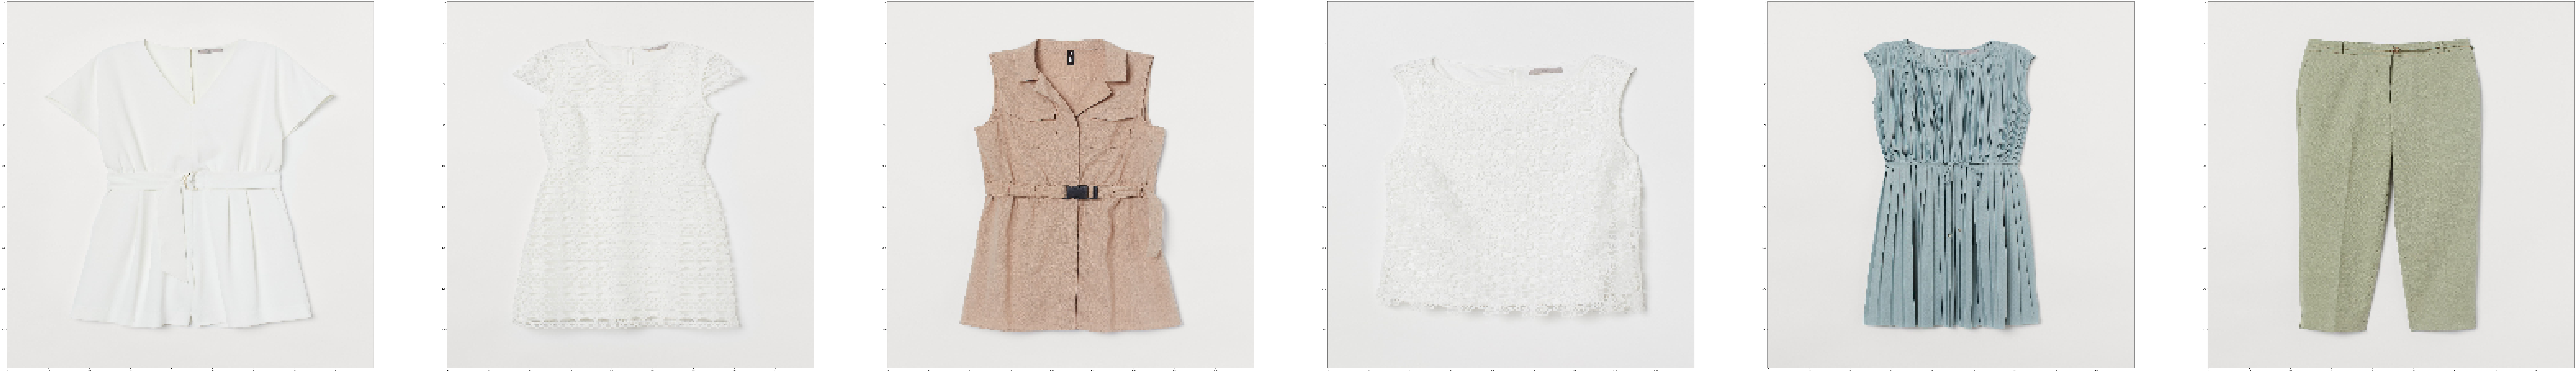

<Figure size 640x480 with 0 Axes>

In [201]:
show_image(cnn_rec)

<h2>Binary Vectorization based Recommendendations </h2>

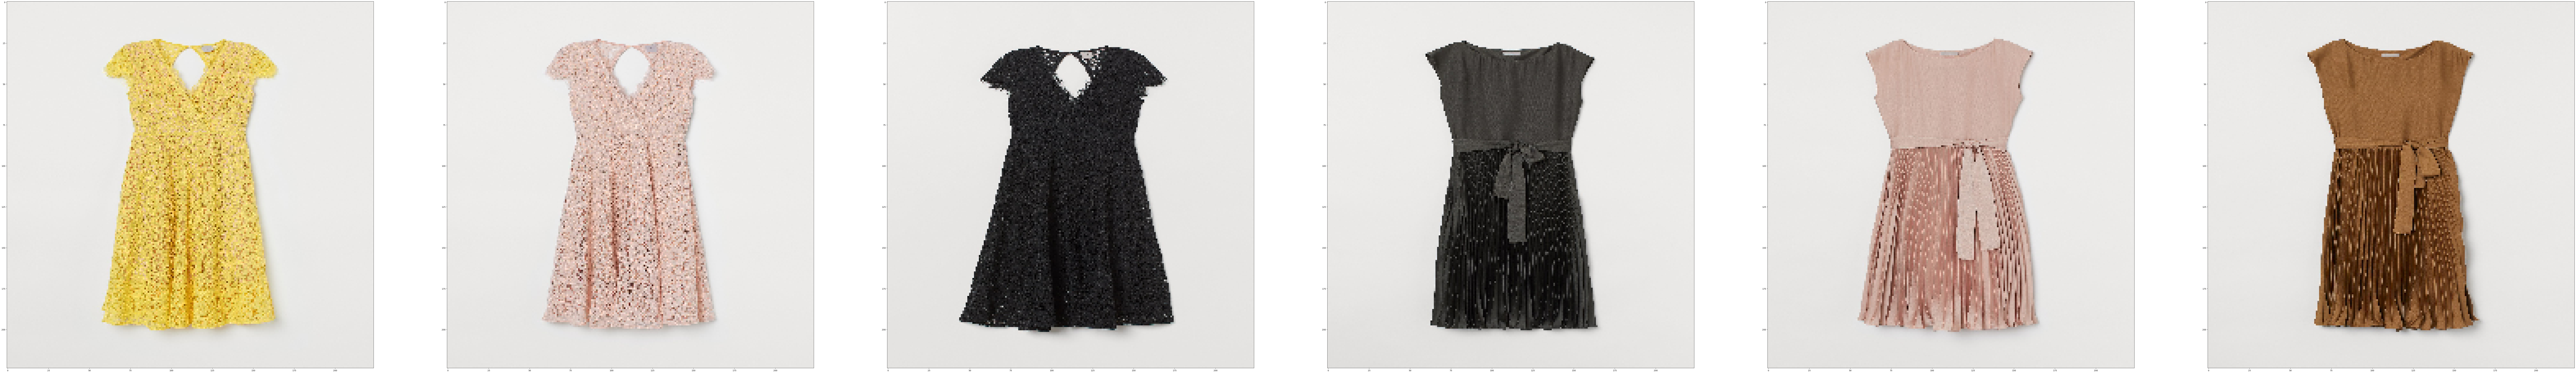

<Figure size 640x480 with 0 Axes>

In [200]:
show_image(bv_rec)

<h2>Thank You </h2>